# Clustering project Wine Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from warnings import filterwarnings
#filterwarnings("ignore")

In [3]:
winedata = pd.read_csv("../Data/wine-clustering.csv")

In [4]:
winedata.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
winedata.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
winedata.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

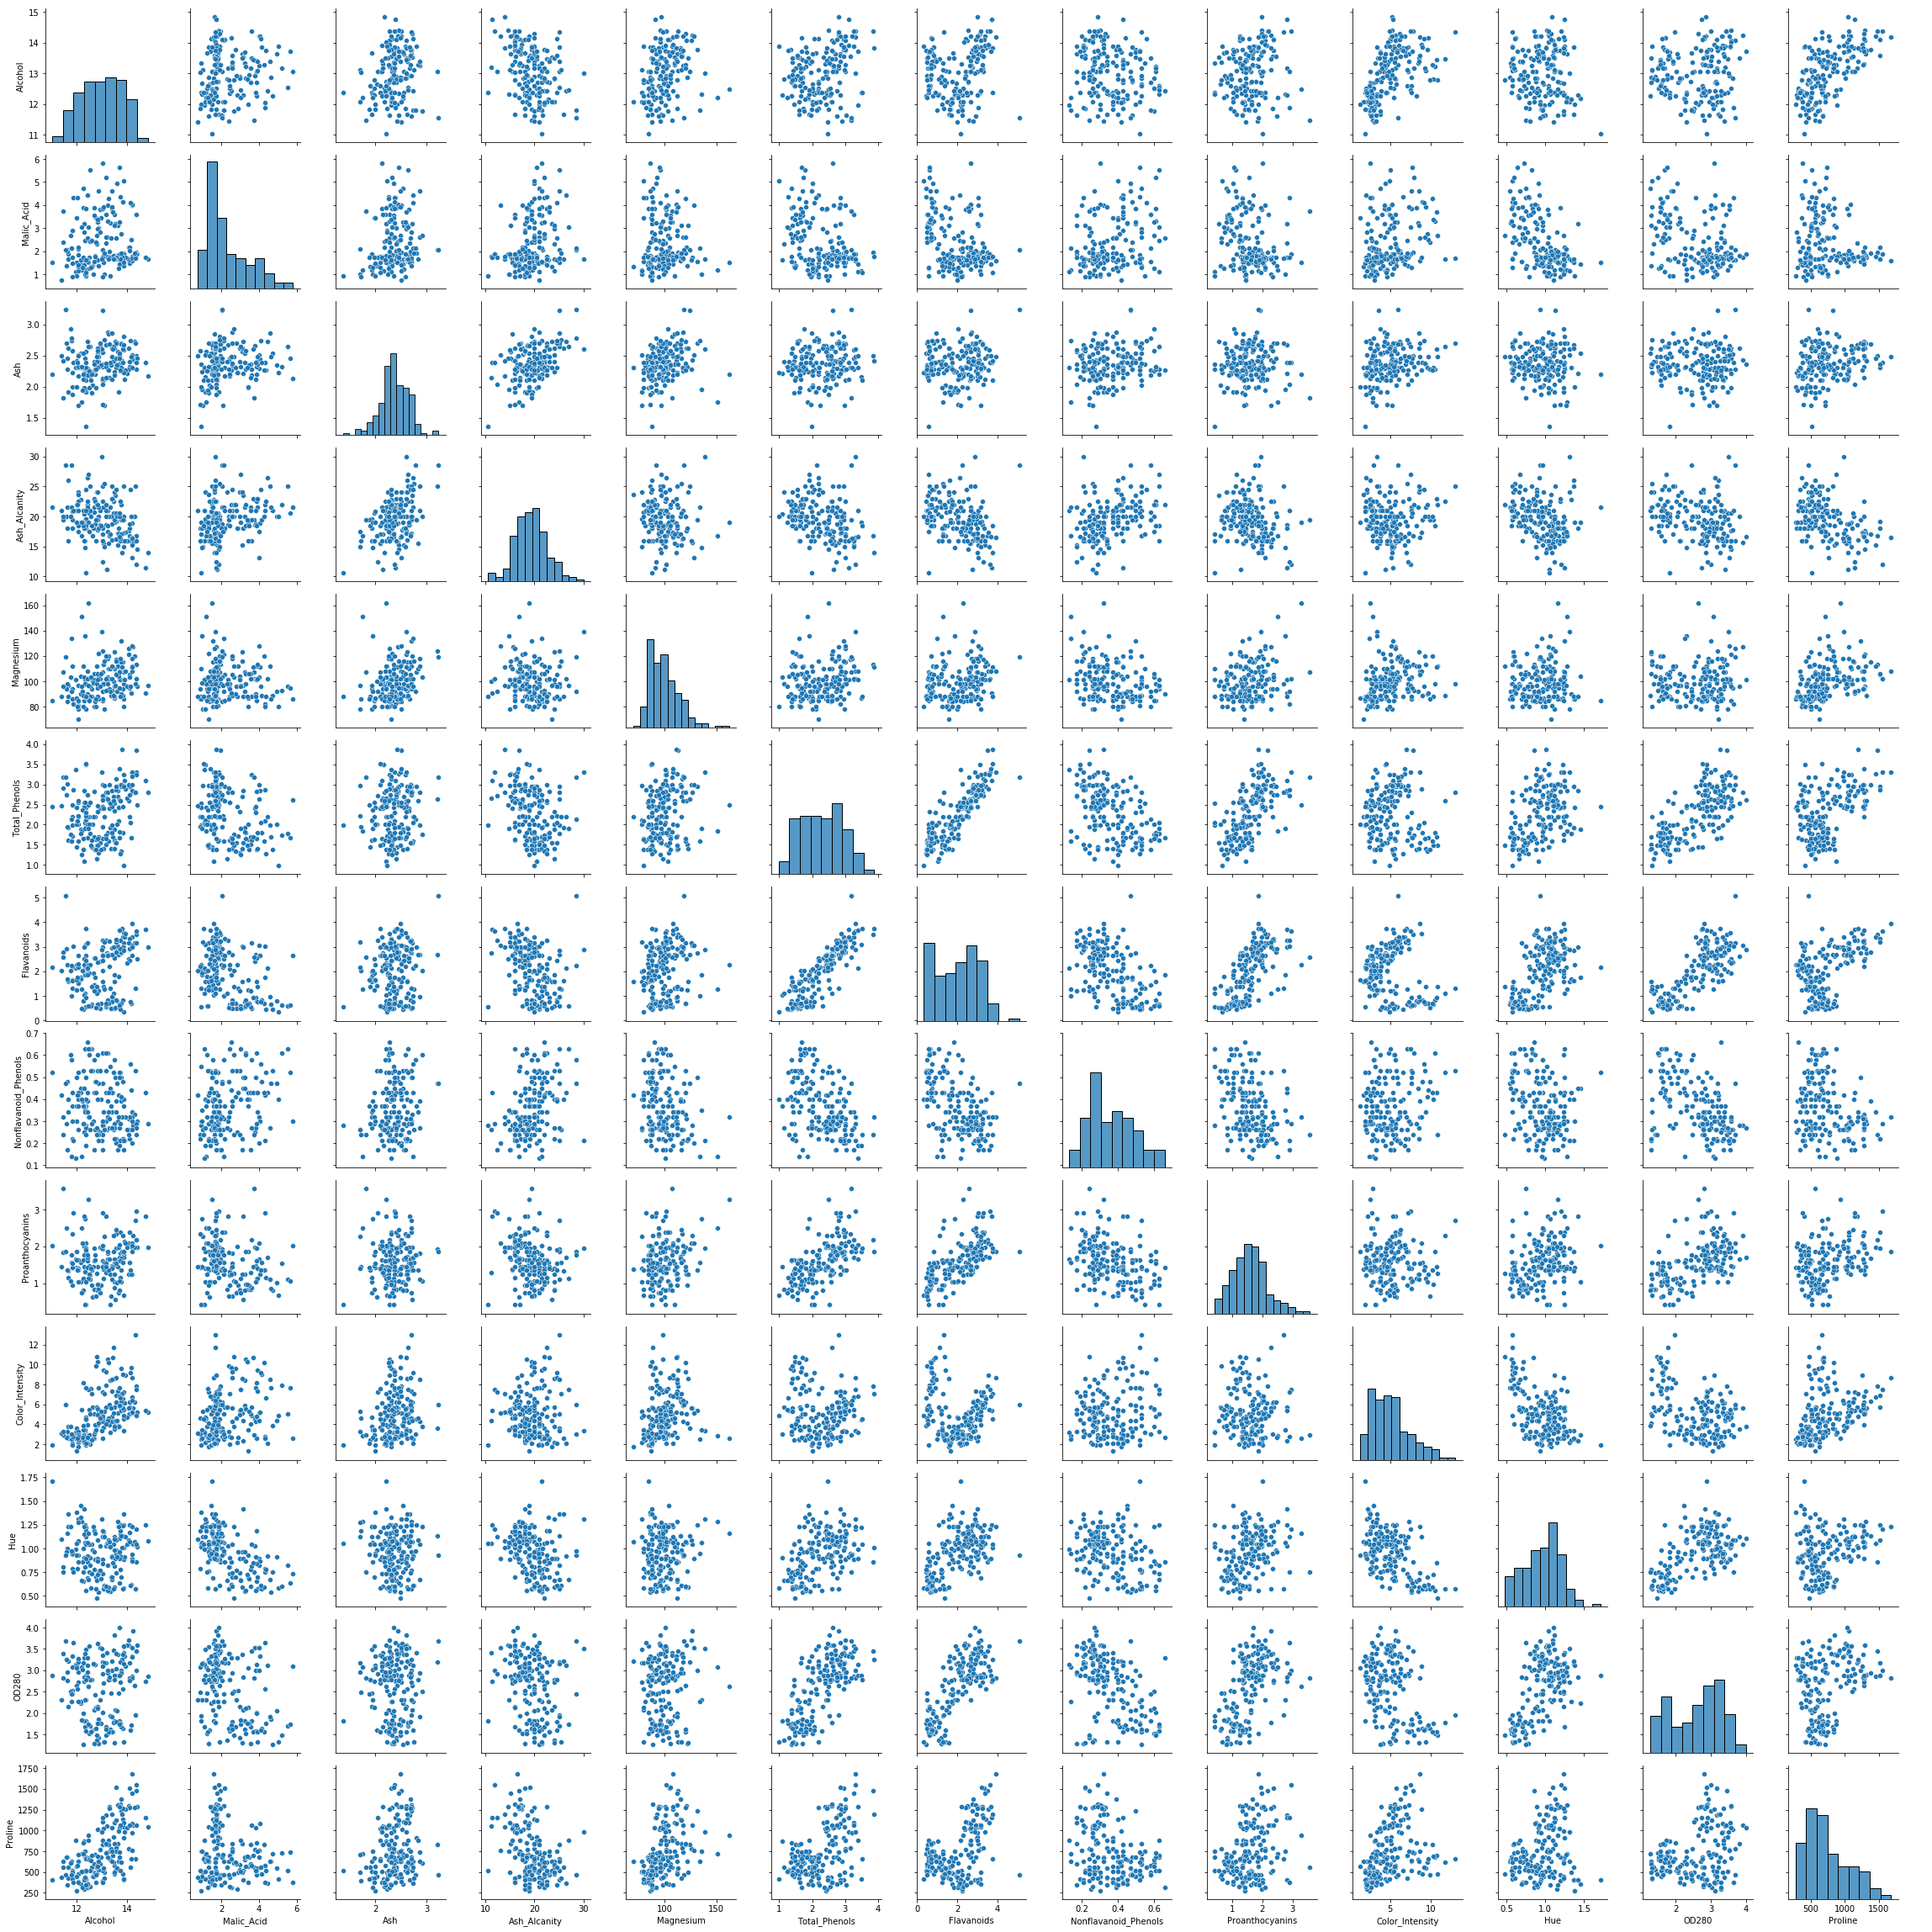

In [7]:
sns.pairplot(winedata);

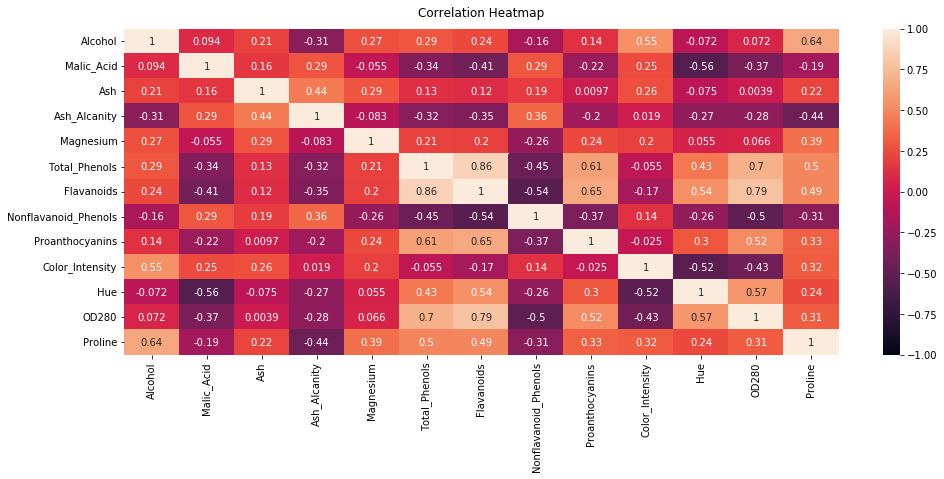

In [8]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(winedata.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

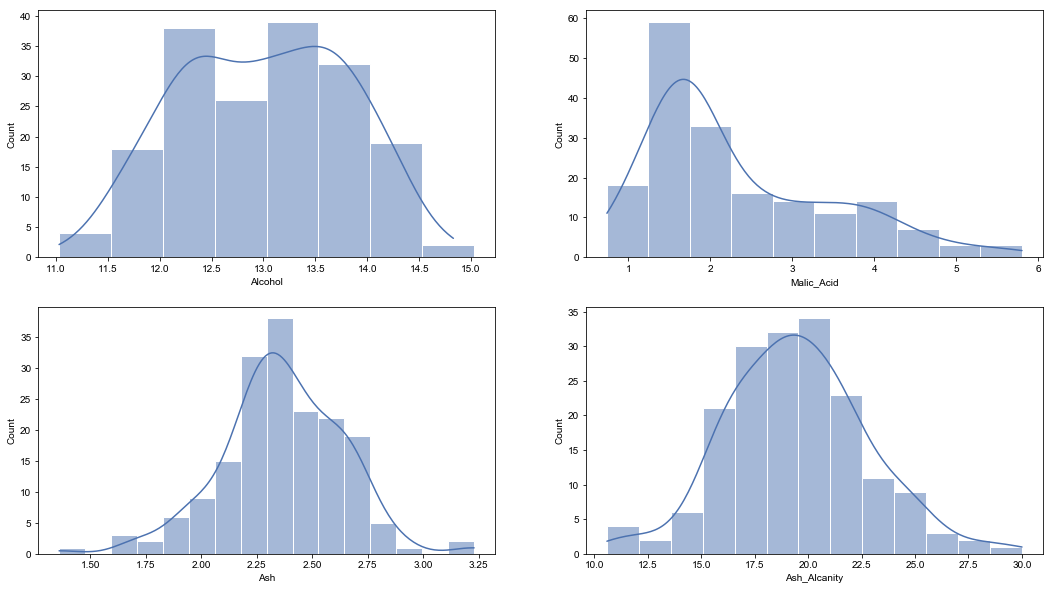

In [9]:
fig, axes = plt.subplots(2,2,figsize=(18, 10))
# use to set style of background of plot
sns.set(style="white")

# use 
sns.histplot(data = winedata, x = "Alcohol", binwidth = 0.5, kde = True, ax=axes[0,0])
sns.histplot(data = winedata, x = "Malic_Acid", kde = True, ax=axes[0,1])
sns.histplot(data = winedata, x = "Ash", kde = True, ax=axes[1,0])
sns.histplot(data = winedata, x = "Ash_Alcanity", kde = True, ax=axes[1,1])

#plt.title('Alcohol')
  
# function to show plot
plt.show()

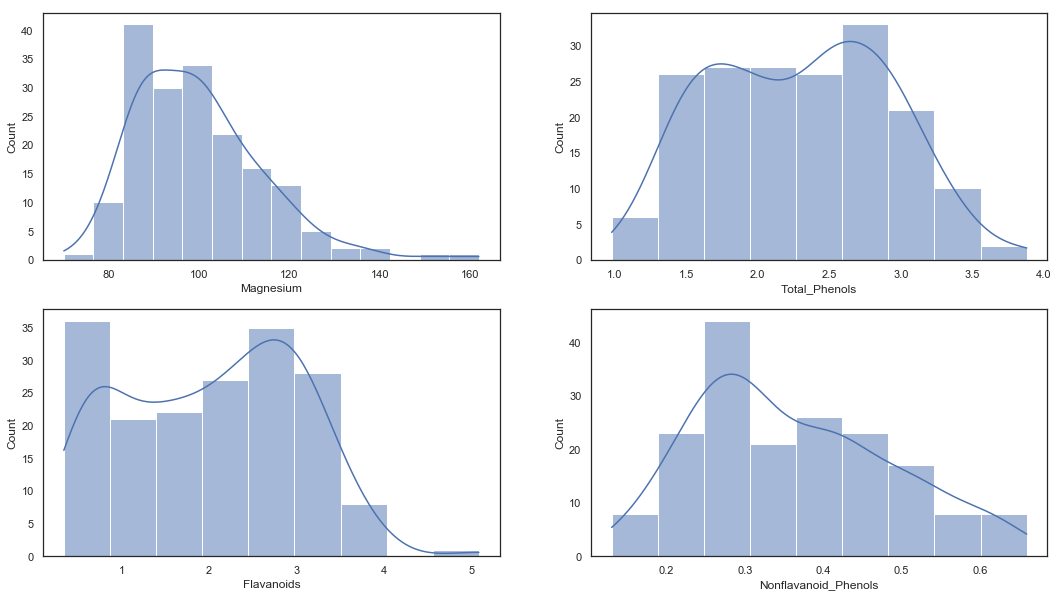

In [10]:
fig, axes = plt.subplots(2,2,figsize=(18, 10))
# use to set style of background of plot
sns.set(style="white")

# use 
sns.histplot(data = winedata, x = "Magnesium",kde = True, ax=axes[0,0])
sns.histplot(data = winedata, x = "Total_Phenols", kde = True, ax=axes[0,1])
sns.histplot(data = winedata, x = "Flavanoids", kde = True, ax=axes[1,0])
sns.histplot(data = winedata, x = "Nonflavanoid_Phenols", kde = True, ax=axes[1,1])

#plt.title('Alcohol')
  
# function to show plot
plt.show()

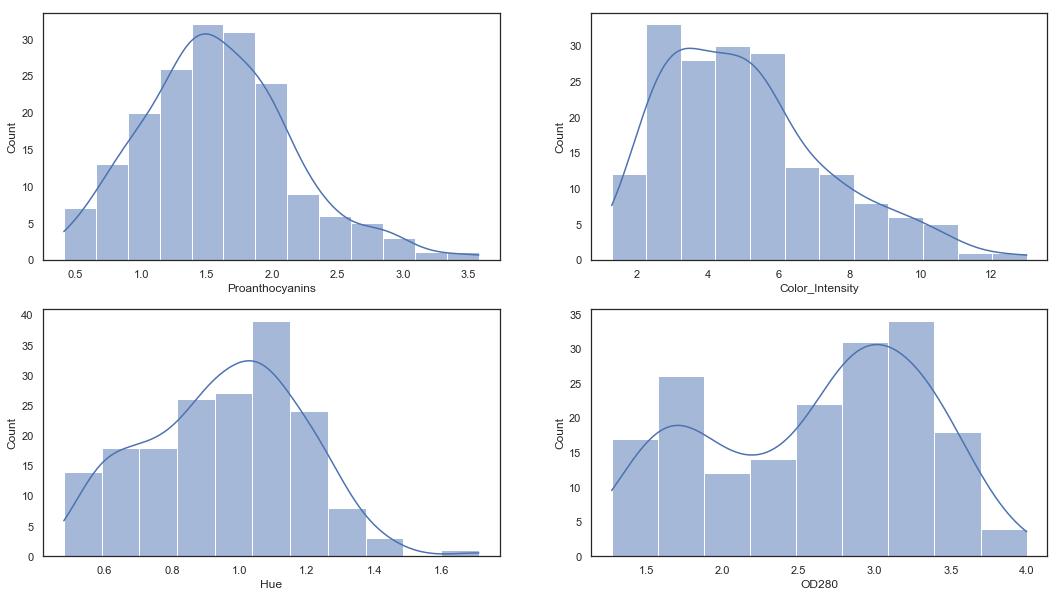

In [11]:
fig, axes = plt.subplots(2,2,figsize=(18, 10))
# use to set style of background of plot
sns.set(style="white")

# use 
sns.histplot(data = winedata, x = "Proanthocyanins",kde = True, ax=axes[0,0])
sns.histplot(data = winedata, x = "Color_Intensity", kde = True, ax=axes[0,1])
sns.histplot(data = winedata, x = "Hue", kde = True, ax=axes[1,0])
sns.histplot(data = winedata, x = "OD280", kde = True, ax=axes[1,1])

#plt.title('Alcohol')
  
# function to show plot
plt.show()

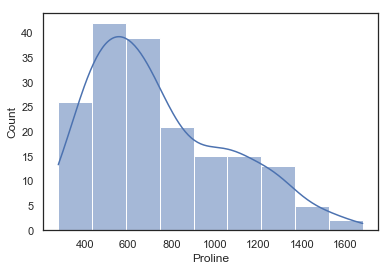

In [12]:
#fig, axes = plt.subplots(2,2,figsize=(18, 10))
# use to set style of background of plot
sns.set(style="white")

# use 
sns.histplot(data = winedata, x = "Proline",kde = True)

#plt.title('Alcohol')
  
# function to show plot
plt.show()

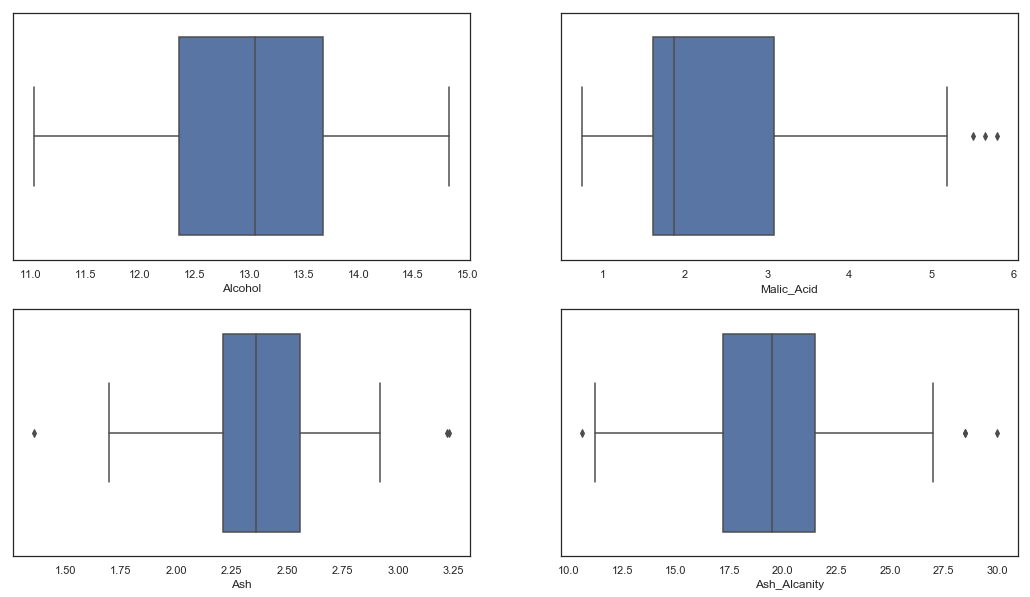

In [13]:
fig, axes = plt.subplots(2,2,figsize=(18, 10))
# use to set style of background of plot
sns.set(style="white")

# use 
sns.boxplot(data = winedata, x = "Alcohol", ax=axes[0,0])
sns.boxplot(data = winedata, x = "Malic_Acid", ax=axes[0,1])
sns.boxplot(data = winedata, x = "Ash", ax=axes[1,0])
sns.boxplot(data = winedata, x = "Ash_Alcanity", ax=axes[1,1])

#plt.title('Alcohol')
  
# function to show plot
plt.show()

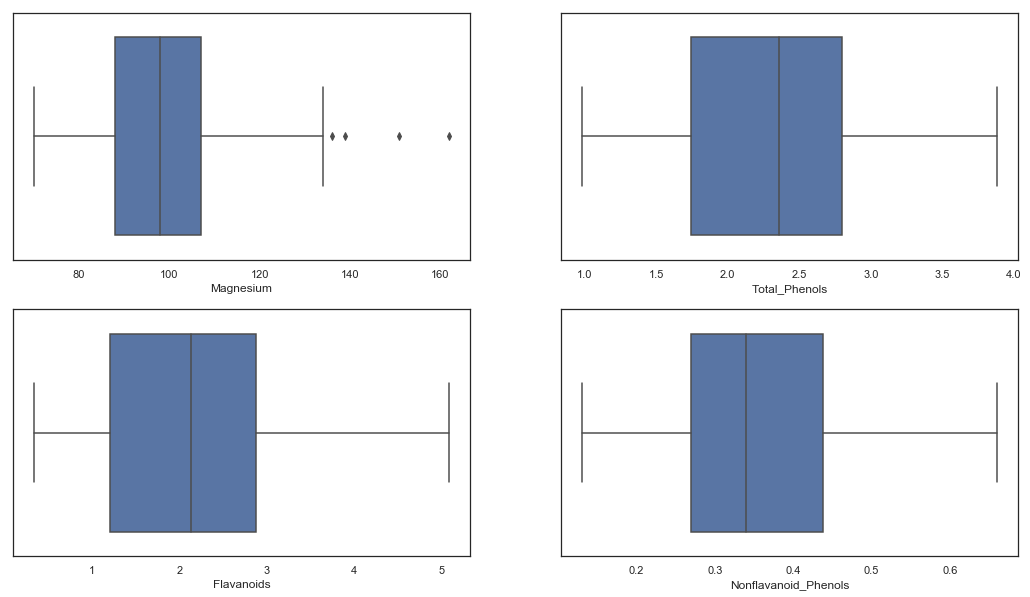

In [14]:
fig, axes = plt.subplots(2,2,figsize=(18, 10))
# use to set style of background of plot
sns.set(style="white")

# use 
sns.boxplot(data = winedata, x = "Magnesium", ax=axes[0,0])
sns.boxplot(data = winedata, x = "Total_Phenols", ax=axes[0,1])
sns.boxplot(data = winedata, x = "Flavanoids", ax=axes[1,0])
sns.boxplot(data = winedata, x = "Nonflavanoid_Phenols", ax=axes[1,1])

#plt.title('Alcohol')
  
# function to show plot
plt.show()

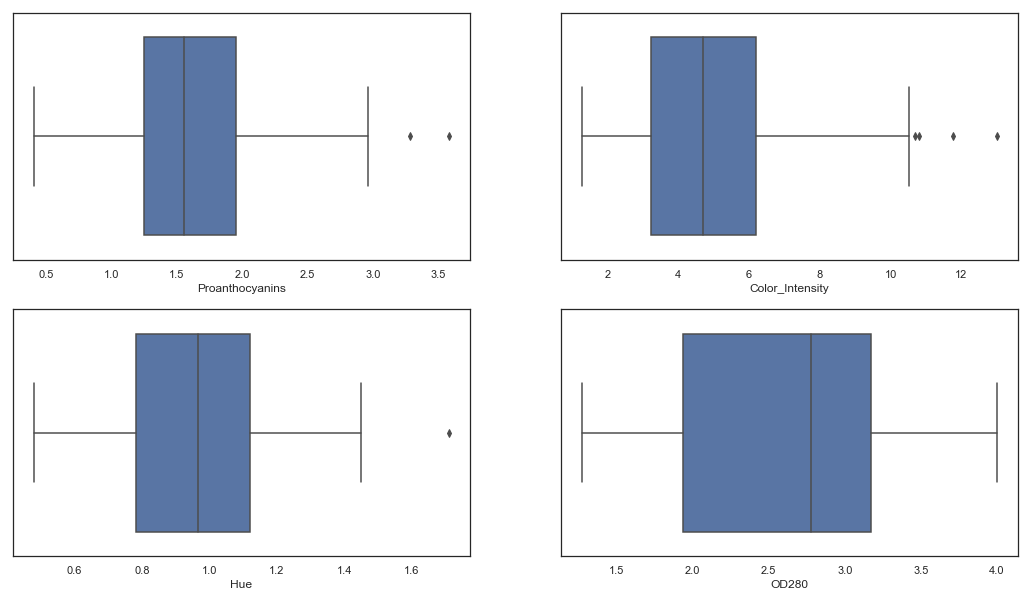

In [15]:
fig, axes = plt.subplots(2,2,figsize=(18, 10))
# use to set style of background of plot
sns.set(style="white")

# use 
sns.boxplot(data = winedata, x = "Proanthocyanins", ax=axes[0,0])
sns.boxplot(data = winedata, x = "Color_Intensity", ax=axes[0,1])
sns.boxplot(data = winedata, x = "Hue", ax=axes[1,0])
sns.boxplot(data = winedata, x = "OD280", ax=axes[1,1])

#plt.title('Alcohol')
  
# function to show plot
plt.show()

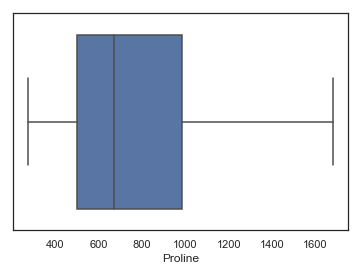

In [16]:
# use to set style of background of plot
sns.set(style="white")

# use 
sns.boxplot(data = winedata, x = "Proline")

#plt.title('Alcohol')
  
# function to show plot
plt.show()

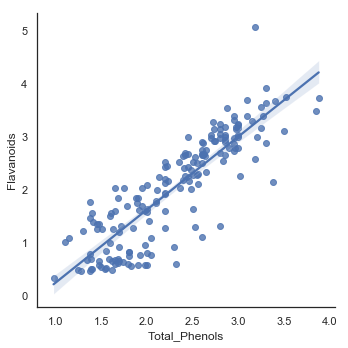

In [17]:
sns.lmplot(x = "Total_Phenols", y ="Flavanoids", data = winedata)

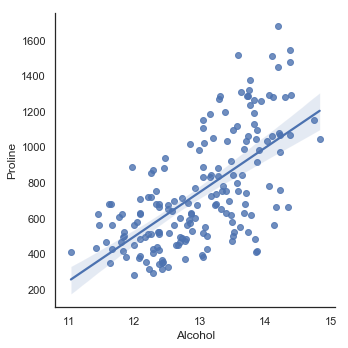

In [18]:
sns.lmplot(x = "Alcohol", y ="Proline", data = winedata)

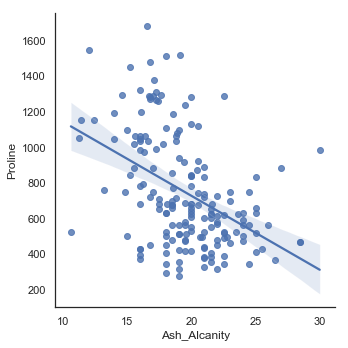

In [19]:
sns.lmplot(x = "Ash_Alcanity", y ="Proline", data = winedata)

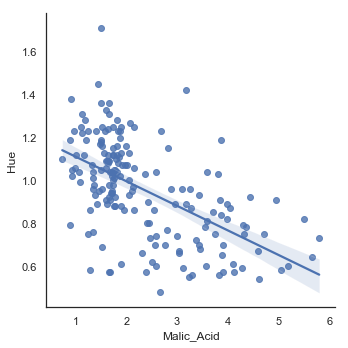

In [20]:
sns.lmplot(x = "Malic_Acid", y ="Hue", data = winedata)

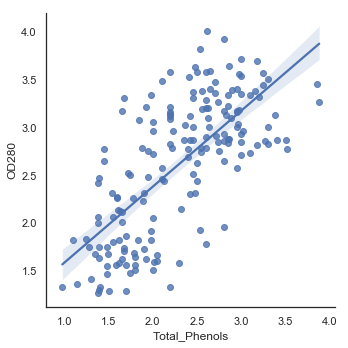

In [21]:
sns.lmplot(x = "Total_Phenols", y ="OD280", data = winedata)

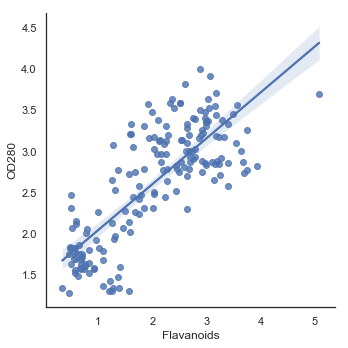

In [22]:
sns.lmplot(x = "Flavanoids", y ="OD280", data = winedata)

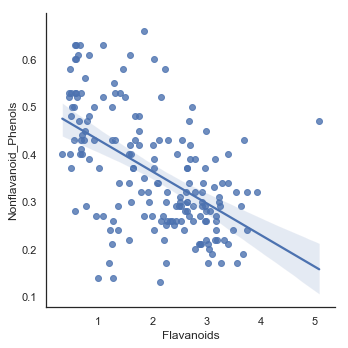

In [23]:
sns.lmplot(x = "Flavanoids", y ="Nonflavanoid_Phenols", data = winedata)
# Nonflavanoid_Phenols

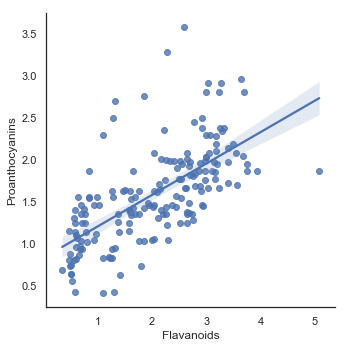

In [24]:
sns.lmplot(x = "Flavanoids", y ="Proanthocyanins", data = winedata)

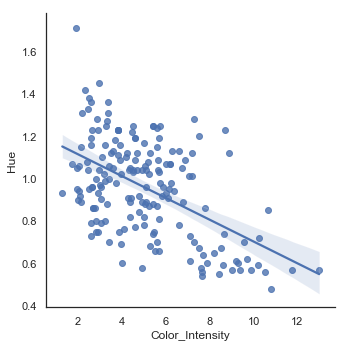

In [25]:
sns.lmplot(x = "Color_Intensity", y ="Hue", data = winedata)

In [ ]:
sns.lmplot(x = "Color_Intensity", y ="Hue", data = winedata)